In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbn

In [2]:
dataFrame = pd.read_excel("merc.xlsx")

In [3]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
dataFrame.describe() #verilerin istatistiksel değerlerini görmek için;

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
#NaN verileri görmek için;
dataFrame.isnull()

,year,price,transmission,mileage,tax,mpg,engineSize
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13114,False,False,False,False,False,False,False
13115,False,False,False,False,False,False,False
13116,False,False,False,False,False,False,False
13117,False,False,False,False,False,False,False


In [6]:
#bütün verilere bakamadığımızdan hangi satırda kaç tane NaN değer olduğunu görebilmek için;
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

## Grafiksel Analizler

C:\Users\Arda\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

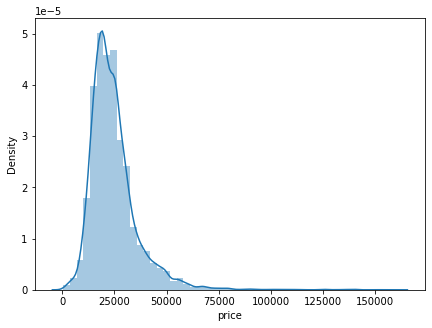

In [7]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["price"])

C:\Users\Arda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

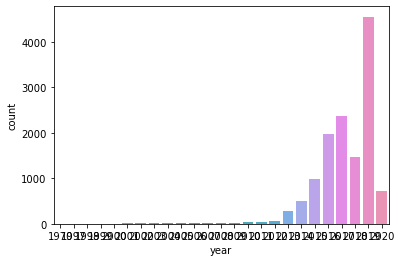

In [8]:
# fiyatı pahalı olan araba sayısı az olduğu için grafikteki saplmaları önlemek adına pahalı olan araçlar veri setinden çıkarılabilir
sbn.countplot(dataFrame["year"])

In [9]:
#verilerin birbirleri arasındaki korelasyona bakmak için;
dataFrame.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [10]:
#fiyatın neye göre değiştiğini bulmak için price kolonunu incelememiz gerekiyor
dataFrame.corr()["price"].sort_values() #sort_values = değerleri diz

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

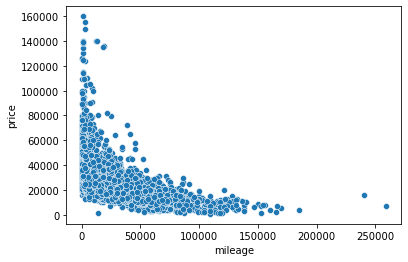

In [11]:
sbn.scatterplot(x="mileage", y="price", data=dataFrame) #verilerin tek tek(noktasal) dağıldığı çizim şeklidir

In [12]:
#çok pahalı fiyatları olan arabaları görmek için;
dataFrame.sort_values("price", ascending = False).head(20) #ascending=False = en yüksek fiyatı en yukarıya getirecektir
                                                    #True olsaydı o zaman en düşük fiyatlıdan yükseğe doğru sıralancaktı

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [34]:
#genellikle veri analizinde toplam verilerin %99 u alındığında veri dağılımında sapma gerçekleşmez
#bu kuralı baz alarak %1 lik kısmı çıkardığımızda bir değişiklik olmayacaktır
#en pahalı %1 lik kesmi bularak çıkarırsak grafiğimiz daha düzgün çizilecektir. Bunun için;

yuzdeDoksandokuzdataFrame = dataFrame.sort_values("price", ascending = False).iloc[131:]
#iloc=index location yani index başlamak ve biriş noktası belirler
yuzdeDoksandokuzdataFrame.describe()



,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\Arda\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

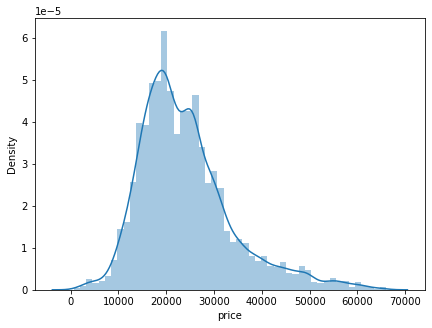

In [35]:
plt.figure(figsize =(7, 5))
sbn.distplot(yuzdeDoksandokuzdataFrame["price"])

In [36]:
#en pahalı verileri çıkararak ilk çizdirdiğimiz plt.figure göre daha düzgün daha stabil bir grafik çizdirmiş olduk
#orjinal dataFrame değişmeden durmaktadır. Bu verileri yuzdeDoksanDokuzDataFrame olarak yazdırdık.

In [37]:
dataFrame.groupby("year").mean()["price"] #yıllara göre grupla(groupby) ve ortalamasını(mean) al

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [38]:
#veriyi regresyona sokmak için birkaç adımı tamamlamamız gerekiyor
#öncelikle veri kolonları içerisinde sayısal değer içermeyen kolonları kaldırmamız gerekiyor
dataFrame = dataFrame.drop("transmission", axis=1)

KeyError: "['transmission'] not found in axis"

In [39]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
0,2005,5200,63000,325,32.1,1.8
1,2017,34948,27000,20,61.4,2.1
2,2016,49948,6200,555,28.0,5.5
3,2016,61948,16000,325,30.4,4.0
4,2016,73948,4000,325,30.1,4.0
...,...,...,...,...,...,...
13114,2020,35999,500,145,55.4,2.0
13115,2020,24699,2500,145,55.4,2.0
13116,2019,30999,11612,145,41.5,2.1
13117,2019,37990,2426,145,45.6,2.0


In [40]:
y = dataFrame["price"].values #y ulaşılmak istenilen değer, .values ile bir numpy dizisine çevirdik
x = dataFrame.drop("price", axis=1).values #price y değerine ait olduğu için x değerleri arasından çıkarmalıyız

In [41]:
from sklearn.model_selection import train_test_split  #dizilerimizi eğiteceğimiz diziye ve test edeceğimiz diziye bölmek için

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10) 

In [43]:
from sklearn.preprocessing import MinMaxScaler 

In [44]:
scaler = MinMaxScaler()  #scaler = elektronik sayıcı demektir. Verileri scale etmeye yarar

In [45]:
x_train = scaler.fit_transform(x_train)

In [46]:
x_test = scaler.transform(x_test) #x_test ve x_train scale edilmiş oldu

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
x_train.shape #transmission değerlerini ve y ye ait olan price değerlerini çıkardığımız için 5 kolon gözükmektedir

(9183, 5)

In [49]:
model = Sequential()
#giriş katmanı eklmeyeliyiz
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))

model.add(Dense(1)) #çıkış katmanı

model.compile(optimizer = "adam", loss="mse")

In [51]:
#modeli eğitmek için,
model.fit(x=x_train, y=y_train, validation_data = (x_test, y_test), batch_size=250, epochs=300) 
#validation data = doğrulama verisi  
#batch size veri yoğunluğuna göre işlemleri kolaylaştırmak için her defasında kaç veri gireceğini ifade eden değerdir
#x_test  ve y_test ile yapılan manuel doğrulama işlemlerini validation data otomatik olarak yapmaktadır

Epoch 1/300
37/37 [==============================] - 1s 5ms/step - loss: 737345632.0000 - val_loss: 769873152.0000
Epoch 2/300
37/37 [==============================] - 0s 1ms/step - loss: 749825601.6842 - val_loss: 769851968.0000
Epoch 3/300
37/37 [==============================] - 0s 1ms/step - loss: 736850310.7368 - val_loss: 769781184.0000
Epoch 4/300
37/37 [==============================] - 0s 1ms/step - loss: 736762041.2632 - val_loss: 769543296.0000
Epoch 5/300
37/37 [==============================] - 0s 1ms/step - loss: 741628821.8947 - val_loss: 768835968.0000
Epoch 6/300
37/37 [==============================] - 0s 1ms/step - loss: 761426253.4737 - val_loss: 767114496.0000
Epoch 7/300
37/37 [==============================] - 0s 1ms/step - loss: 729556053.8947 - val_loss: 763479872.0000
Epoch 8/300
37/37 [==============================] - 0s 1ms/step - loss: 750663789.4737 - val_loss: 756641664.0000
Epoch 9/300
37/37 [==============================] - 0s 1ms/step - loss: 7210289

37/37 [==============================] - 0s 1ms/step - loss: 108371050.1053 - val_loss: 121187856.0000
Epoch 72/300
37/37 [==============================] - 0s 1ms/step - loss: 102353505.4737 - val_loss: 120591120.0000
Epoch 73/300
37/37 [==============================] - 0s 1ms/step - loss: 105959112.0000 - val_loss: 120002776.0000
Epoch 74/300
37/37 [==============================] - 0s 1ms/step - loss: 96445425.0526 - val_loss: 119404752.0000
Epoch 75/300
37/37 [==============================] - 0s 1ms/step - loss: 102683229.6842 - val_loss: 118776656.0000
Epoch 76/300
37/37 [==============================] - 0s 1ms/step - loss: 100343621.2632 - val_loss: 118161736.0000
Epoch 77/300
37/37 [==============================] - 0s 1ms/step - loss: 106762078.7368 - val_loss: 117537664.0000
Epoch 78/300
37/37 [==============================] - 0s 1ms/step - loss: 98356696.0000 - val_loss: 116958864.0000
Epoch 79/300
37/37 [==============================] - 0s 1ms/step - loss: 99604848.0000

37/37 [==============================] - 0s 1ms/step - loss: 47681220.7368 - val_loss: 56952920.0000
Epoch 143/300
37/37 [==============================] - 0s 1ms/step - loss: 51586682.4211 - val_loss: 56329792.0000
Epoch 144/300
37/37 [==============================] - 0s 1ms/step - loss: 50243267.4737 - val_loss: 55775760.0000
Epoch 145/300
37/37 [==============================] - 0s 1ms/step - loss: 48297521.6316 - val_loss: 55117536.0000
Epoch 146/300
37/37 [==============================] - 0s 1ms/step - loss: 54515000.1053 - val_loss: 54500084.0000
Epoch 147/300
37/37 [==============================] - 0s 1ms/step - loss: 47438275.2632 - val_loss: 53918000.0000
Epoch 148/300
37/37 [==============================] - 0s 1ms/step - loss: 42634180.3684 - val_loss: 53345964.0000
Epoch 149/300
37/37 [==============================] - 0s 1ms/step - loss: 42153553.8947 - val_loss: 52812000.0000
Epoch 150/300
37/37 [==============================] - 0s 1ms/step - loss: 47148630.8421 - val

37/37 [==============================] - 0s 1ms/step - loss: 34322232.4211 - val_loss: 38629480.0000
Epoch 214/300
37/37 [==============================] - 0s 1ms/step - loss: 35506031.4737 - val_loss: 38540656.0000
Epoch 215/300
37/37 [==============================] - 0s 1ms/step - loss: 32763116.8421 - val_loss: 38483736.0000
Epoch 216/300
37/37 [==============================] - 0s 1ms/step - loss: 30454534.2105 - val_loss: 38438180.0000
Epoch 217/300
37/37 [==============================] - 0s 1ms/step - loss: 38829950.2105 - val_loss: 38421552.0000
Epoch 218/300
37/37 [==============================] - 0s 1ms/step - loss: 34767020.2632 - val_loss: 38306476.0000
Epoch 219/300
37/37 [==============================] - 0s 2ms/step - loss: 34629440.0526 - val_loss: 38236804.0000
Epoch 220/300
37/37 [==============================] - 0s 1ms/step - loss: 32746459.3158 - val_loss: 38167252.0000
Epoch 221/300
37/37 [==============================] - 0s 1ms/step - loss: 35734184.7895 - val

37/37 [==============================] - 0s 1ms/step - loss: 32275952.7895 - val_loss: 35894504.0000
Epoch 285/300
37/37 [==============================] - 0s 1ms/step - loss: 32597765.6842 - val_loss: 35875696.0000
Epoch 286/300
37/37 [==============================] - 0s 1ms/step - loss: 30266924.6316 - val_loss: 35867428.0000
Epoch 287/300
37/37 [==============================] - 0s 2ms/step - loss: 29618956.8421 - val_loss: 35848892.0000
Epoch 288/300
37/37 [==============================] - 0s 1ms/step - loss: 29181368.1579 - val_loss: 35838896.0000
Epoch 289/300
37/37 [==============================] - 0s 1ms/step - loss: 30721655.0526 - val_loss: 35810844.0000
Epoch 290/300
37/37 [==============================] - 0s 1ms/step - loss: 31718669.3158 - val_loss: 35784872.0000
Epoch 291/300
37/37 [==============================] - 0s 1ms/step - loss: 31628795.5789 - val_loss: 35783976.0000
Epoch 292/300
37/37 [==============================] - 0s 1ms/step - loss: 33129081.5263 - val

In [52]:
##Sonuçları değerlendirmek
# Değerlendirme için hem loss değerlerini hemde validation loss değerlerini grafiğe dökmemiz gerekiyor

In [53]:
kayıpVerisi = pd.DataFrame(model.history.history)

In [55]:
kayıpVerisi.head()

,loss,val_loss
0,741845120.0,769873152.0
1,741830912.0,769851968.0
2,741791104.0,769781184.0
3,741656704.0,769543296.0
4,741232256.0,768835968.0


<AxesSubplot:>

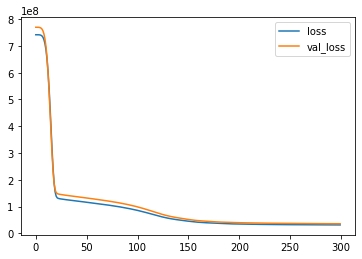

In [56]:
kayıpVerisi.plot()

In [57]:
#Grafikte ilk bakılması gereken yukarıdan aşağı doğru bir iniş var mı, grafikte değerler düzgün olarak azalmış mı?
#İkincisi loss ve validation loss birlikte hareket ediyor mu?
#Çizgilerde bir sapma var ise grafik over feeding olmuş demektir, ilk olarak epochs u azaltmak çözüm olabilir.,
#Bu grafik tek başına yeterli değildir. sklearn ile bazı değerleri çıkartıp tahminler yapmamız gerekecektir

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [60]:
tahminDizisi = model.predict(x_test)

In [61]:
mean_absolute_error(y_test, tahminDizisi)

3773.763389184223

In [62]:
#absolute hataları karşılaştırmak için yukarıdaki işlemler uygulanır ve fark değeri gözükür

In [63]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [64]:
#ortalama fiyat 24 bin pound, 3773 pound sapma değeri, sapma değerini ortalama fiyata bölersek yüzde farkı bulmuş oluruz
#bu değerler için %15 lik bir fark gözükmektedir yani sapma değeri
#bu değer kabul edilebilir mi yoksa edilemez mi buna karar verecek kişi veriyi kullanacak kişidir
#farkı azaltmak için eğitim değerlerini değiştirerek tekrar deneme yapabiliriz (katmanlar, epochs vb..)

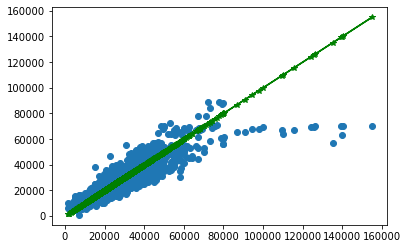

In [66]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test, y_test, "g-*")

In [67]:
#grafikte çok büyük bir fark olmadığı görülmektedir.
#birkaç deneme daha yapabiliriz;

In [68]:
#dataFrame de bir satırdan veri alarak deneme yapabiliriz
dataFrame.iloc[2]

year           2016.0
price         49948.0
mileage        6200.0
tax             555.0
mpg              28.0
engineSize        5.5
Name: 2, dtype: float64

In [73]:
yeniArabaSeries = dataFrame.drop("price", axis=1).iloc[2] #yukarıdaki iloc 2 değerini dataFrame den çıkarmış olduk

In [74]:
type(yeniArabaSeries)

pandas.core.series.Series

In [75]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))  
#reshape yazmamızın mantığı, values ile bir diziye dönüştürememesidir. 
#Bir diziye dönüştürürken belirtilmediği sürece en fazla 5 row girilir. Bunu düzeltmek için -1 den 5 yaptık ve 6 değer göstermiş olduk

In [76]:
model.predict(yeniArabaSeries) #sapmaya göre yeni araba 62225 pound olacak demektedir. iloc aldığımızdaki değer 49948 pounddur.

array([[62225.83]], dtype=float32)